In [1]:
#import data manipulation libraries
import pandas as pd
import numpy as np

#import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import filter warning libraries
import warnings
warnings.filterwarnings('ignore')

#Import loggings
import logging
logging.basicConfig(level = logging.INFO,
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    filemode = 'w',
                    filename = 'model.log', force = True)

#Import Sci-kit Learn Libraries for model building
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
url = 'https://raw.githubusercontent.com/anirudhakolay/Bank_Telemarketing_Classifier/refs/heads/main/bank.csv'
df = pd.read_csv(url)
df.sample(frac=1)

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
3766,"38;""technician"";""single"";""secondary"";""no"";311;..."
1439,"30;""blue-collar"";""married"";""secondary"";""no"";50..."
2011,"31;""blue-collar"";""married"";""primary"";""no"";0;""y..."
3493,"36;""management"";""single"";""tertiary"";""no"";-679;..."
484,"54;""management"";""married"";""tertiary"";""no"";55;""..."
...,...
1078,"32;""technician"";""single"";""tertiary"";""no"";0;""no..."
857,"36;""blue-collar"";""married"";""secondary"";""no"";-4..."
162,"41;""admin."";""single"";""secondary"";""no"";-256;""no..."
1936,"37;""management"";""single"";""tertiary"";""no"";695;""..."


In [3]:
url = 'https://raw.githubusercontent.com/anirudhakolay/Bank_Telemarketing_Classifier/refs/heads/main/bank.csv'
df = pd.read_csv(url, sep = ';')
df.sample(frac=1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
789,37,blue-collar,divorced,primary,no,511,yes,no,telephone,11,may,42,1,-1,0,unknown,no
1636,53,retired,married,secondary,no,4968,no,no,cellular,6,may,109,1,87,2,failure,no
3551,42,management,married,secondary,no,2416,yes,no,unknown,20,may,138,4,-1,0,unknown,no
3877,62,unknown,married,secondary,no,367,no,no,telephone,2,mar,139,5,-1,0,unknown,no
2154,36,blue-collar,married,secondary,no,63,yes,no,unknown,2,jun,56,8,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2599,52,management,married,tertiary,no,-1224,yes,no,cellular,7,may,253,4,-1,0,unknown,no
3386,32,blue-collar,married,secondary,no,517,yes,no,unknown,5,may,528,1,-1,0,unknown,no
372,38,services,married,secondary,no,-140,no,no,unknown,25,jun,456,3,-1,0,unknown,no
1325,28,management,single,tertiary,no,1027,yes,no,cellular,14,may,433,1,-1,0,unknown,no


In [4]:
#Dataset information
df.info() #no of col*20(min rows data to train model)=20*17

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
#Evaluate Descriptive stats: EDA

# Step 1: Sagregate Categorical columns nd Numerical
categorical_col = df.select_dtypes(include = 'object')
numerical_col = df.select_dtypes(include = ['int64','float64']) #or exclude = 'object'


In [ ]:
#Step 2: Evaluate Descriptive Stats
#Logistic model works onSigmoid function
from collections import OrderedDict

stats = []

for i in numerical_col.columns:
    numerical_stats = OrderedDict({
        'Feature' : i,
        'Mean' : df[i].mean(),
        'Median' : df[i].median(),
        'Mode' : df[i].mode()[0],
        'Minimum' : df[i].min(),
        'Maximum' : df[i].max(),
        'Q1' : df[i].quantile(0.25),
        'Q3' : df[i].quantile(0.75),
        'IQR' : df[i].quantile(0.75) - df[i].quantile(0.25), #IQR cannot be 0
        'Std' : df[i].std(),
        'skewness' : df[i].skew(), #positive skewness (right skew), negative skewness (left skew), and zero skewness (symmetrical distribution, i.e. normal data)
        'kurtosis' : df[i].kurtosis(), # mesokurtic, leptokurtic, and platykurtic.
        'Variance' : df[i].var(),
        'Standard Deviation' : df[i].std() #spread of data, under root variance
        
    })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)
report

#WHen evaluating Descriptive analysis IQR of any col cannot be 0, the col will not contribute in ML model performance

,Feature,Mean,Median,Mode,Minimum,Maximum,Q1,Q3,IQR,Std,skewness,kurtosis,Variance,Standard Deviation
0,age,41.170095,39.0,34,19,87,33.0,49.0,16.0,10.576211,0.699501,0.348775,1.118562e+02,10.576211
1,balance,1422.657819,444.0,0,-3313,71188,69.0,1480.0,1411.0,3009.638142,6.596431,88.390332,9.057922e+06,3009.638142
2,day,15.915284,16.0,20,1,31,9.0,21.0,12.0,8.247667,0.094627,-1.039531,6.802402e+01,8.247667
3,duration,263.961292,185.0,123,4,3025,104.0,329.0,225.0,259.856633,2.772420,12.530050,6.752547e+04,259.856633
4,campaign,2.793630,2.0,1,1,50,1.0,3.0,2.0,3.109807,4.743914,37.168920,9.670897e+00,3.109807
5,pdays,39.766645,-1.0,-1,-1,871,-1.0,-1.0,0.0,100.121124,2.717071,7.957128,1.002424e+04,100.121124
6,previous,0.542579,0.0,0,0,25,0.0,0.0,0.0,1.693562,5.875259,51.995212,2.868153e+00,1.693562


<Axes: xlabel='month', ylabel='duration'>

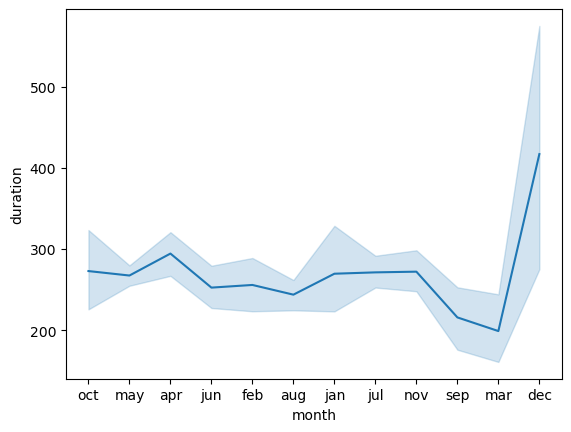

In [12]:
sns.lineplot(x = df['month'],y = df['duration'])